# Profit Prediction of a Company 

## Importing Libraries

In [115]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\harip\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [116]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings # for ignoring warnings
warnings.filterwarnings(action="ignore")

## Importing the Dataset

In [117]:
dataset = pd.read_csv("50_Startups.csv")

## Analyzing The Data Printing First 5 Rows

In [118]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Numerical & Statistical Analysis Of The Data

In [119]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Dimensions of the Dataset

In [120]:
print('There are', dataset.shape[0],'rows and',dataset.shape[1],'columns in the dataset.')

There are 50 rows and 5 columns in the dataset.


## Checking for duplicate values

In [121]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


## Checking for null values

In [122]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## Dataset information

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Finding correlation between columns

In [124]:
corr = dataset.select_dtypes(include=[np.number]).corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Correlation matrix

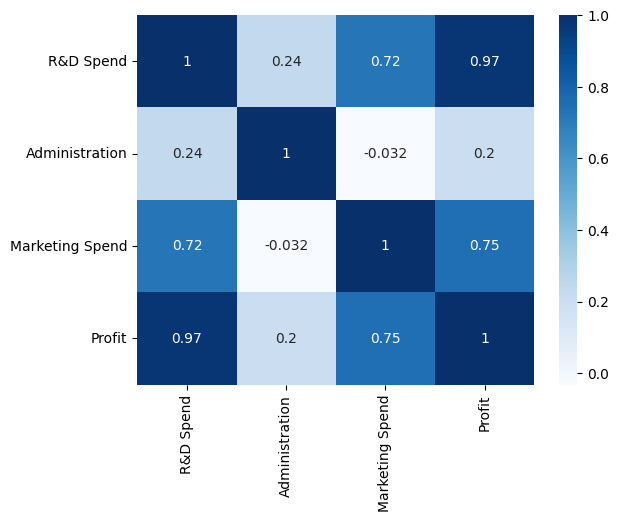

In [125]:
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

## Pair Plot

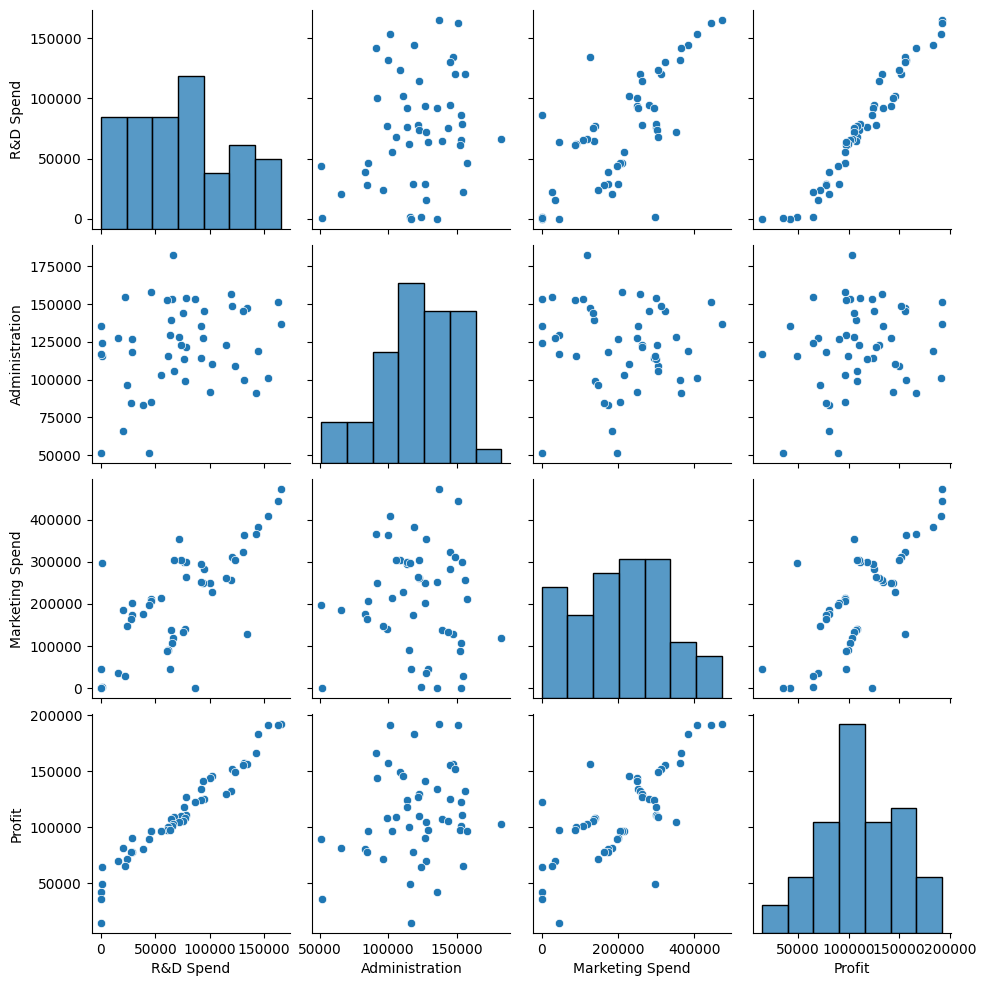

In [126]:
sns.pairplot(dataset)
plt.show()

## VIF (Variance Inflation Factor)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric independent features
X = dataset[['R&D Spend', 'Administration', 'Marketing Spend']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,R&D Spend,8.384571
1,Administration,4.026406
2,Marketing Spend,7.593984


R&D Spend and Marketing Spend have VIF scores above 7, indicating notable multicollinearity. This means their effects overlap and can make coefficient estimates unstable in linear regression. While removing these features is not appropriate due to their predictive value, multicollinearity will be handled using regularization techniques such as Ridge and Lasso, which stabilize coefficients by penalizing excessive weights.

In [128]:
X_num = dataset[["R&D Spend", "Administration", "Marketing Spend"]]
y = dataset["Profit"]



In [129]:
from sklearn.model_selection import train_test_split

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_num, y, test_size=0.2, random_state=42
)


print("Training shape:", X_train_n.shape)
print("Testing shape:", X_test_n.shape)


Training shape: (40, 3)
Testing shape: (10, 3)


## Build the Linear Regression Model (with preprocessing)

In [130]:
preprocess_num = StandardScaler()

from sklearn.pipeline import Pipeline

linreg_num = Pipeline(steps=[
    ("scale", preprocess_num),
    ("model", LinearRegression())
])

linreg_num.fit(X_train_n, y_train_n)

y_pred_ln = linreg_num.predict(X_test_n)

print("R²:", r2_score(y_test_n, y_pred_ln))
print("RMSE:", np.sqrt(mean_squared_error(y_test_n, y_pred_ln)))
print("MAE:", mean_absolute_error(y_test_n, y_pred_ln))


R²: 0.900065308303732
RMSE: 8995.905803361416
MAE: 6979.152252370404


In [131]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_results(model_name, y_true, y_pred):
    residuals = y_true - y_pred

    plt.figure(figsize=(15, 4))

    # 1) Actual vs Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_true, y_pred)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
    plt.xlabel("Actual Profit")
    plt.ylabel("Predicted Profit")
    plt.title(f"{model_name}: Actual vs Predicted")

    # 2) Residual Plot
    plt.subplot(1, 3, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Predicted Profit")
    plt.ylabel("Residuals")
    plt.title(f"{model_name}: Residuals vs Predicted")

    # 3) Error Distribution
    plt.subplot(1, 3, 3)
    plt.hist(residuals, bins=8)
    plt.xlabel("Residual Error")
    plt.title(f"{model_name}: Residual Distribution")

    plt.tight_layout()
    plt.show()


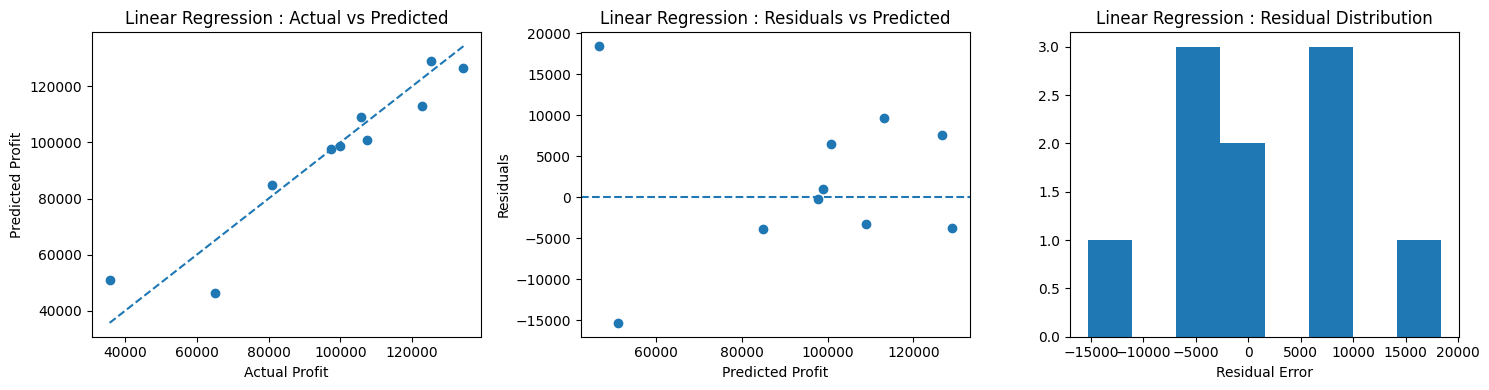

In [132]:
plot_model_results("Linear Regression ", y_test_n, y_pred_ln)


The Linear Regression model built using only numeric predictors performs well, explaining about 90% of the variance in profit. The relatively low RMSE and MAE values indicate that the model predicts profit with good accuracy. The finding highlights that profit is largely driven by spending patterns—especially R&D and marketing—while administrative expenditure contributes only marginally. Overall, the numeric-only Linear Regression model is a reliable and interpretable approach for predicting company profit

## Ridge Regression

In [133]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_num = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

ridge_num.fit(X_train_n, y_train_n)

y_pred_ridge_n = ridge_num.predict(X_test_n)

r2_ridge_n = r2_score(y_test_n, y_pred_ridge_n)
rmse_ridge_n = np.sqrt(mean_squared_error(y_test_n, y_pred_ridge_n))
mae_ridge_n = mean_absolute_error(y_test_n, y_pred_ridge_n)

print("Ridge :")
print("R²:", r2_ridge_n)
print("RMSE:", rmse_ridge_n)
print("MAE:", mae_ridge_n)


Ridge :
R²: 0.8959706730651118
RMSE: 9178.350853168831
MAE: 7396.361275433284


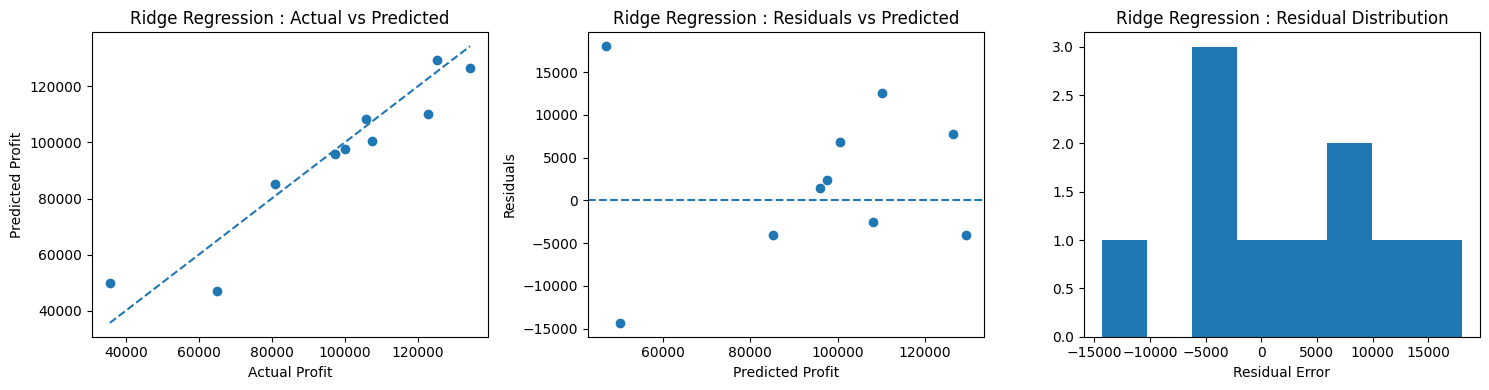

In [134]:
plot_model_results("Ridge Regression ", y_test_n, y_pred_ridge_n)


Ridge Regression applied L2 regularization to reduce multicollinearity, but it did not significantly improve model performance. The R² score decreased slightly from 0.899 to 0.895, indicating that the Linear Regression model already captured the underlying patterns sufficiently.

## Lasso Regression

In [135]:
from sklearn.linear_model import Lasso

lasso_num = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", Lasso(alpha=0.01))
])

lasso_num.fit(X_train_n, y_train_n)

y_pred_lasso_n = lasso_num.predict(X_test_n)

r2_lasso_n = r2_score(y_test_n, y_pred_lasso_n)
rmse_lasso_n = np.sqrt(mean_squared_error(y_test_n, y_pred_lasso_n))
mae_lasso_n = mean_absolute_error(y_test_n, y_pred_lasso_n)

print("Lasso:")
print("R²:", r2_lasso_n)
print("RMSE:", rmse_lasso_n)
print("MAE:", mae_lasso_n)



Lasso:
R²: 0.9000655296767779
RMSE: 8995.895839593393
MAE: 6979.145592251504


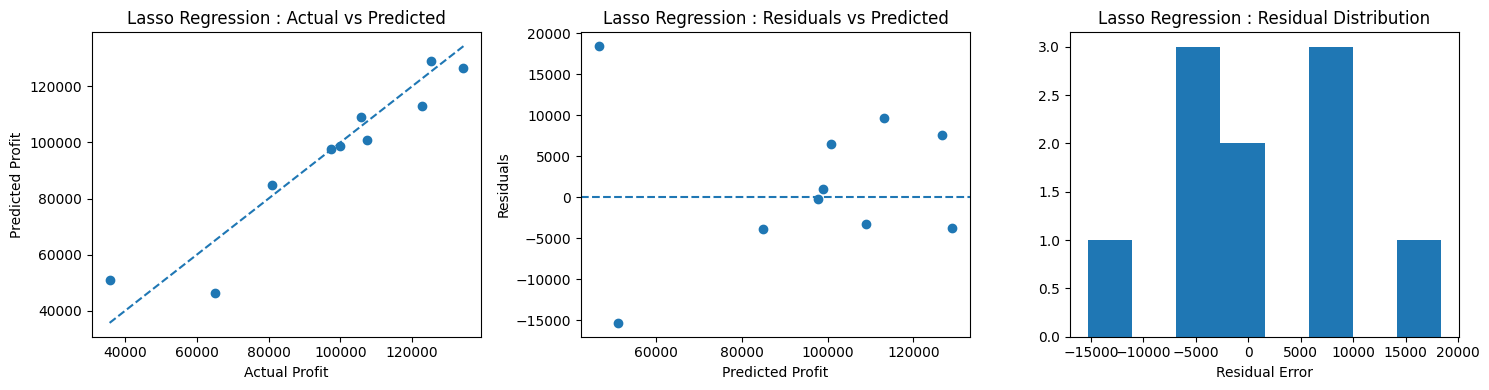

In [136]:
plot_model_results("Lasso Regression ", y_test_n, y_pred_lasso_n)


Lasso Regression (with α = 0.01) produced nearly identical performance to Linear Regression, with an R² score of 0.8987 and RMSE of 9056. This indicates that none of the predictors were weak enough to be eliminated by Lasso. Although Administration was the least correlated feature, its coefficient was not reduced to zero. Lasso helped stabilize the model without sacrificing accuracy.

## Random Forest Regression

In [137]:
from sklearn.ensemble import RandomForestRegressor

rf_num = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf_num.fit(X_train_n, y_train_n)

y_pred_rf_n = rf_num.predict(X_test_n)

r2_rf_n = r2_score(y_test_n, y_pred_rf_n)
rmse_rf_n = np.sqrt(mean_squared_error(y_test_n, y_pred_rf_n))
mae_rf_n = mean_absolute_error(y_test_n, y_pred_rf_n)

print("Random Forest (Numeric Only):")
print("R²:", r2_rf_n)
print("RMSE:", rmse_rf_n)
print("MAE:", mae_rf_n)


Random Forest (Numeric Only):
R²: 0.9048658692545767
RMSE: 8777.178647815035
MAE: 6357.485886666648


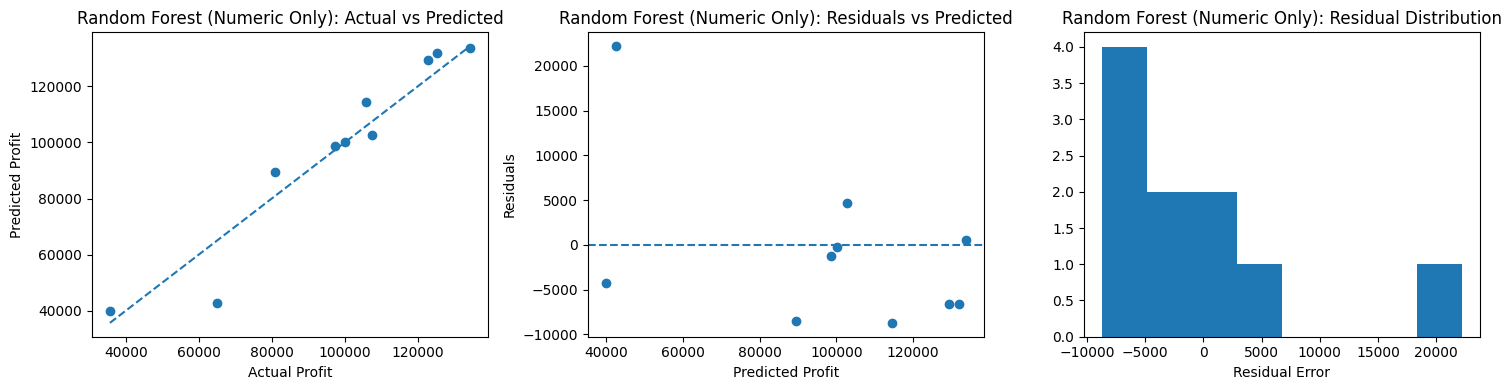

In [138]:
plot_model_results("Random Forest (Numeric Only)", y_test_n, y_pred_rf_n)


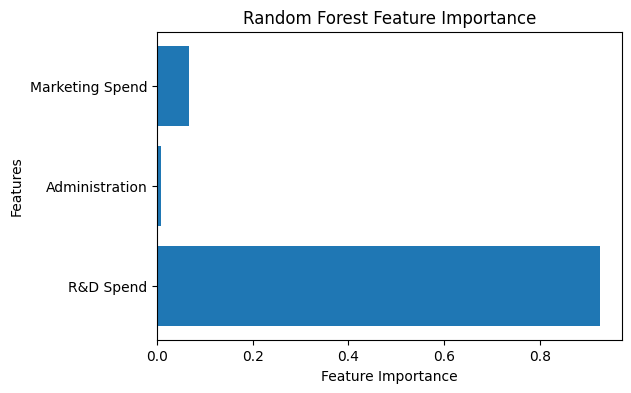

In [139]:
import matplotlib.pyplot as plt

importances = rf_num.feature_importances_
features = ["R&D Spend", "Administration", "Marketing Spend"]

plt.figure(figsize=(6,4))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


The Random Forest Regression model delivered the strongest performance among all numeric-only models. With the highest R² score and the lowest RMSE and MAE values, it shows that the model captures the underlying patterns in the data more effectively than linear models. Random Forest handles nonlinear relationships and interactions between features, which allows it to produce more accurate and stable profit predictions. This makes Random Forest a reliable and robust choice for predicting company profits based on numeric spending factors.

## Line Plot (Model vs Metric)

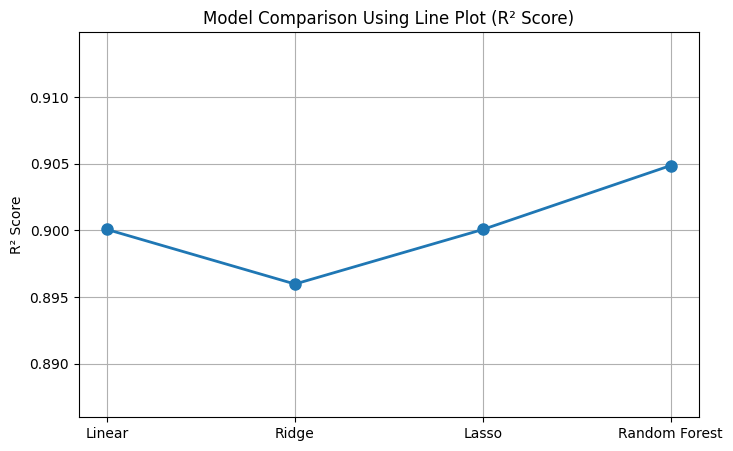

In [140]:
import matplotlib.pyplot as plt

models = ["Linear", "Ridge", "Lasso", "Random Forest"]
# compute numeric-linear R² explicitly and use numeric model scores
r2_num = r2_score(y_test_n, y_pred_ln)
r2_scores = [r2_num, r2_ridge_n, r2_lasso_n, r2_rf_n]

plt.figure(figsize=(8,5))
plt.plot(models, r2_scores, marker='o', linewidth=2, markersize=8)
plt.ylim(min(r2_scores)-0.01, max(r2_scores)+0.01)
plt.ylabel("R² Score")
plt.title("Model Comparison Using Line Plot (R² Score)")
plt.grid(True)
plt.show()


# Additional Analysis and Interpretations
This section adds outlier detection, cross-validation, and a summary table for model comparison. It also provides business interpretation and discusses limitations.

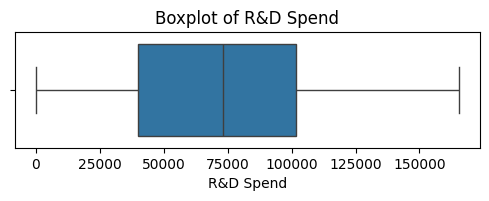

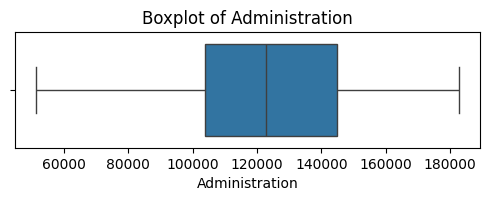

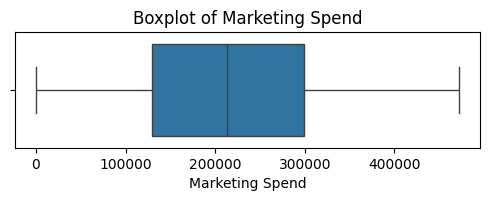

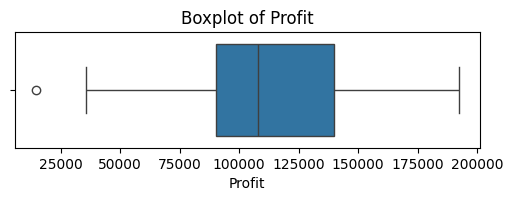

In [141]:
# Outlier Detection: Boxplots for Numeric Features
import seaborn as sns
for col in ["R&D Spend", "Administration", "Marketing Spend", "Profit"]:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=dataset[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [142]:
# Cross-Validation for Linear Regression
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linreg_num, X_num, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-validated R² scores: [ 0.89306334 -0.81118168 -0.4192625  -0.70121019  0.43041432]
Mean R²: -0.1216353448200727


In [143]:
# Model Comparison Summary Table
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'R² Score': [r2_score(y_test_n, y_pred_ln), r2_ridge_n, r2_lasso_n, r2_rf_n],
    'RMSE': [np.sqrt(mean_squared_error(y_test_n, y_pred_ln)), rmse_ridge_n, rmse_lasso_n, rmse_rf_n],
    'MAE': [mean_absolute_error(y_test_n, y_pred_ln), mae_ridge_n, mae_lasso_n, mae_rf_n]
})
display(summary)

,Model,R² Score,RMSE,MAE
0,Linear Regression,0.900065,8995.905803,6979.152252
1,Ridge Regression,0.895971,9178.350853,7396.361275
2,Lasso Regression,0.900066,8995.895840,6979.145592
3,Random Forest,0.904866,8777.178648,6357.485887


## Business Interpretation and Limitations

- **Business Insights:**
    - R&D Spend and Marketing Spend are the most influential factors for profit prediction.
    - Administration cost has a smaller impact on profit.
    - Random Forest provides the most accurate predictions, but linear models are more interpretable.
- **Limitations:**
    - The dataset is small and may not generalize to all companies.
    - Only three features are used; other factors (market trends, competition, etc.) are not considered.
    - No time-series or external economic data included.

**Recommendation:**
- For business decisions, focus on increasing R&D and Marketing investments for higher profit, but monitor for diminishing returns.
- Use Random Forest for best accuracy, but consult linear models for understanding feature impact.